In [ ]:
# 本日の講座は機械学習20本ノックです。
# 目次は次のようになります。データの欠損値の扱い方やデータエンジニアリングの観点で基礎的な部分を扱います。
# 最後に3つのモデルで分類と回帰を行います。

# データ前処理(pandas)
# データ読み込み 1
# 欠損値の確認 2
# 欠損値処理
# 欠損値除去 3
# 欠損値埋め 4
# 乱数補完 5, 6
# 前の値で補完 7
# データエンジニアリング
# ダミー変数化 8
# Min-Max scaling 9
# 標準化 10
# 主成分分析PCA 11, 12, 13
# モデル構築(3本)
# 分類
# Logistic回帰 14, 15, 16
# k近傍法 17
# 回帰
# 重回帰分析 18, 19, 20

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob

In [46]:
# 1. データの読み込み
# data.csvをdfとして読み込み、先頭の5件を表示しなさい。
df = pd.read_csv("/content/data.csv")
df.head()

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male


In [47]:
# 2. 欠損値の確認
# dfのカラムごとの欠損値の数を確認しなさい

# ざっと確認する方法 True = 欠損値
df.info()

# 具体的な数
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    891 non-null    object 
 1   Age     714 non-null    float64
 2   Sex     878 non-null    object 
dtypes: float64(1), object(2)
memory usage: 21.0+ KB


Name      0
Age     177
Sex      13
dtype: int64

In [48]:
# 3. 欠損値除去
# 欠損値のある行を削除しなさい。
# df.dropna() - dfが新しく形成されるだけで、上書きされるわけではない
df.dropna()
df.shape

(891, 3)

In [74]:
# 4. 欠損値補完
# ageカラムの統計値を確認したあと、欠損値を以下の3つのパターンで補完しなさい。

# 0
# 平均値
# 中央値

df[["Age"]].tail()

#df[[""]].describe() - まとめて確認したい場合
print(df[["Age"]].describe())

# ageカラムの統計値を確認したあと、欠損値を以下の3つのパターンで補完しなさい。
# 0 df[["Age"]].fillna(補完する値) - 
df_zero = df[['Age']].fillna(0)
print(df_zero.tail(3))

# 平均値
df_mean = df[["Age"]].fillna(int(df["Age"].mean()))
print(df_mean.tail())

# 平均の出し方 df["Age"].mean()
# int(df["Age"].mean())　整数にしてあげる
# 年齢は整数なのでint型への変換を忘れないように

# 中央値
df_median = df[["Age"]].fillna(df["Age"].median())
print(df_median.tail())

              Age
count  714.000000
mean    29.699118
std     14.526497
min      0.420000
25%     20.125000
50%     28.000000
75%     38.000000
max     80.000000
      Age
888   0.0
889  26.0
890  32.0
      Age
886  27.0
887  19.0
888  29.0
889  26.0
890  32.0
      Age
886  27.0
887  19.0
888  28.0
889  26.0
890  32.0


In [100]:
# 5. 乱数補完(part1 乱数生成)
# ageカラムの値を元に乱数(平均と分散はageカラムから算出)を作成しなさい。

mean = df["Age"].mean()
std = df["Age"].std()
num = df["Age"].isnull().sum()

# randint ランダムでかつ、整数(int)
# 範囲はageカラムの平均から標準偏差を足し引きする
rand = np.random.randint(mean - std, mean + std, size=num)
rand

array([], dtype=int64)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


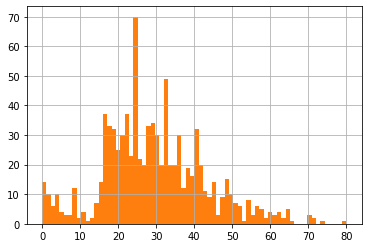

In [106]:
# 6. 乱数補完(part2 前後の分布の確認)
# 補完前の分布を確認後、作成した乱数で欠損値を補完し、分布に差がないか確認しなさい。

# 補完前 - int型に変更する, bins = 棒の数
print(df['Age'].dropna().astype(int).hist(bins=70))

# 補完 - df["Age"] [df["Age"].isnull()] - 条件抽出
df['Age'][df['Age'].isnull()] = rand

# 補完後
print(df['Age'].astype(int).hist(bins=70))

In [109]:
# 7. 前の値で補完
# カラムsexの欠損値を一つ前の値で補完しなさい。(NaN→female)

print(df["Sex"].head())

# method="ffill" - ffill - forward fill 前で埋める
df[['Sex']].fillna(method="ffill").head()

0      male
1    female
2       NaN
3    female
4      male
Name: Sex, dtype: object


,Sex
0,male
1,female
2,female
3,female
4,male


In [112]:
# 8. ダミー変数へ変換
# カテゴリ変数である性別(sex)カラムのデータをダミー表現(male→0, female→1)に変形させなさい。
print(df["Sex"].head())

# pd.get_dummies(ダミー変数化したいcolumns)
pd.get_dummies(df["Sex"])

# 片方の情報だけあれば十分なため半分をdropする
pd.get_dummies(df["Sex"]).drop("male",axis=1)

0      male
1    female
2       NaN
3    female
4      male
Name: Sex, dtype: object


,female
0,0
1,1
2,0
3,1
4,0
...,...
886,0
887,1
888,1
889,0


In [114]:
# 9. Min-Max Scaling 
# Ageカラムのデータを最小値0、最大値1に正規化しなさい。
# ただし、元のデータ範囲はAgeカラムの最大値最小値とする。
# ヒント：sklearn.preprocessingの中のモジュールを使う

from sklearn.preprocessing import MinMaxScaler

In [125]:
# MinMaxScalerをインスタンス化する 
mmscaler = MinMaxScaler(feature_range=(0,1),copy=True)
lim_min,lim_max= df["Age"].min(),df["Age"].max()

# これで最小値と最大値を学習してくれる
# reshape(-1,1) - 縦のベクトルに変える
mmscaler.fit(np.array([lim_min, lim_max]).reshape(-1, 1))

# mmscaler.transform((df[["Age"]]) - Ageのデータをもとにtransform(整形してくれる)
mmscaler.transform(df[['Age']])

# mmscaler.transform(df[['Age']]).max() - 最大値を見れる
# mmscaler.transform(df[['Age']]).min() - 最小値を見れる

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


1.0

In [126]:
# 10. 標準化
# Ageカラムのデータを平均0、分散1に標準化しなさい。

from sklearn.preprocessing import StandardScaler

In [128]:
# インスタンス化
ss=StandardScaler()
ss.fit_transform(df[['Age']])

# ss.fit_transform(df[['Age']]).mean() - 平均
# ss.fit_transform(df[['Age']]).std() - 標準偏差

1.3556932107656232e-16

In [137]:
# 11 主成分分析(part1 標準化)
# 主成分分析 - 時限削減してデータを可視化する時に用いられる
# wine.csvを読み込み(df_wineとする),closeラベルを除いたデータを平均0,分散1で標準化（dfsとする）しなさい

df_wine = pd.read_csv("/content/wine.csv")
df_wine.head()

# クラス以外を取る方法 - iloc[行,列]
# 標準化されたものが入る
_dfs = ss.fit_transform(df_wine.iloc[:,1:]) # 標準化

# このままではクラスの部分がないため結合する
dfs = pd.DataFrame(_dfs,columns=df_wine.columns[1:]) # クラスラベル以外のカラムをそのまま転用

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [138]:
# 12. 主成分分析(part2 変換)
# 先ほど標準化したデータを用いてsklearn.decompositionからPCAモデルを読み込み
# .transform()関数を用いてデータを変換しなさい(ただしfeatureという変数名にする)。

from sklearn.decomposition import PCA #主成分分析器

In [139]:
#主成分分析の実行(インスタンス化を行う)
pca = PCA()
pca.fit(dfs) # データから学習するための１行

# データを主成分空間に写像
feature = pca.transform(dfs) # データを整形する

In [143]:
# 主成分得点
# "PC{}".format(x + 1) for x in range(len(dfs.columns) - カラムを作成する
# 新たに情報を作っている
feature = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))]) # データフレームへ変換 以下のようにカラム名を設定
feature.head()

# これで主成分分析をすることができた

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


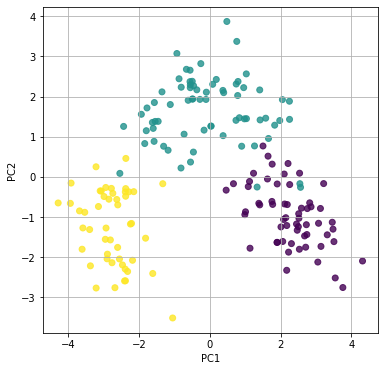

In [147]:
# 13. 主成分分析(part3 プロット)
# 先ほどのfeatureから第一主成分と第二主成分をプロットしなさい。

# 第一主成分と第二主成分でプロットする

# 6*6でグラフを表示する
plt.figure(figsize=(6, 6))

#plt.scatter(横軸(第一主成分), 縦軸(第二主成)）, alpha=0.8(透明度), c(color)=df_wine["class"]) - df_wine["class"]は色分け 
plt.scatter(feature["PC1"], feature["PC2"], alpha=0.8, c=df_wine["class"])

# グリッド線を引く
plt.grid()

plt.xlabel("PC1")
plt.ylabel("PC2")

# クラスごとに分けられているのがわかる
plt.show()

# 第一主成分が一番情報が濃い

In [156]:
# 14. ロジスティック回帰(part1 データ分割)
# 先ほどのデータを訓練データとテストデータに分割(8:2)しなさい。
# ただし入力はfeature第2列目までとし、出力はdf_wine先頭列とする。
# またデータの分割はsklearn.model_selection.train_test_splitを活用しなさい。
# random_stateは3とする

# 実務では1,training 2,test 3,validationの３つのデータに分割をする
from sklearn.model_selection import train_test_split

X = feature.iloc[:, :2] # 入力データ　feature.iloc[:(全ての行), :2(２列まで)] 
y = df_wine.iloc[:, 0] # 出力データ

# train_test_split(入力データ, 出力データ, test_size = 0.2(20%の検証データ), random_state(分割方法) = 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3) # 80%のデータを学習データに、20%を検証データにする

print(X_train)
print(X_test)
print(y_train)
print(y_test)

          PC1       PC2
42   3.070807 -1.155919
67   0.183384  2.427146
31   2.677411 -1.471874
141 -2.286561 -0.372508
5    3.050254 -2.122401
..        ...       ...
21   1.086570 -0.241744
0    3.316751 -1.443463
131 -2.384501 -0.374583
152 -1.812541 -1.527646
106 -0.366267  2.169353

[142 rows x 2 columns]
          PC1       PC2
40   2.588095 -0.779616
53   2.224791 -1.875168
34   1.410389 -0.697934
109  1.578275  1.462034
159 -1.609912 -2.406638
23   1.644988  0.516279
46   2.726601 -1.191335
72  -0.725372  1.063645
78   1.262931  0.770850
38   1.502195  0.769432
64  -0.609681  1.908059
3    3.757066 -2.756372
82  -0.494877  2.381244
70  -1.572216  0.884983
51   2.858960 -0.745279
6    2.449090 -1.174850
84   0.835320  1.473671
15   2.305188 -1.662552
154 -2.737151 -0.409886
163 -2.597497 -0.697966
58   3.139380 -1.731579
136 -3.915754 -0.154583
25   0.990079 -0.940667
176 -2.387017 -2.297347
71   1.657682  0.956712
115  0.482074  3.871784
47   2.821339 -0.646259
41   0.668482 -0

In [157]:
# 15. ロジスティック回帰(part2 モデルの学習)
# 先ほどのtrainデータを用いてロジスティック回帰でモデルの学習を行いなさい。

# from sklearn.linear_model import LogisticRegression - sklearn.linear_model(これはクラス)
from sklearn.linear_model import LogisticRegression

# インスタンス化する必要がある
lr = LogisticRegression() # ロジスティック回帰モデルのインスタンスを作成
lr.fit(X_train, y_train) # ロジスティック回帰モデルの重みを学習
# これで学習を行うことができた

# どの手法においても
# １、アルゴリズムをimport　
# ２、インスタンス化をして(lr = LogisticRegression()) 
# 3,lr.fit(X_train, y_train)をすることでデータから学習を行う

LogisticRegression()

In [158]:
# 16. ロジスティック回帰(part3 性能評価)
# 先ほど学習したモデルの精度(accuracy)を評価しなさい。
# ただし、sklearn.metrics.accuracy_scoreを活用すること。

# lr.predict()　- これで予測を行うことができる

y_pred = lr.predict(X_test)
print(y_pred)

[1 1 1 2 3 2 1 2 2 2 2 1 2 2 1 1 2 1 3 3 1 3 1 3 2 2 1 1 2 3 2 1 3 2 2 3]


In [159]:
from sklearn.metrics import accuracy_score
# from sklearn.metrics import accuracy_score - 指標を見れる

# accuracy_score(実測値, 予測値)
# 91％の精度で予測できている - 問題の設定によるがおおむねいい精度
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))

accuracy =  0.9166666666666666


In [160]:
# おまけ
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[0.73642001]]
intercept =  [-3.39483004]

coefficient =  [[ 1.11298882 -0.68639865]
 [ 0.29438085  1.83906073]
 [-1.40736967 -1.15266209]]
intercept =  [ 0.39324441  0.88555902 -1.27880344]


In [161]:
# 17. k-近傍法
# 先ほどのデータをk-近傍法で分類しなさい。
# Classifier - 分類

from sklearn.neighbors import KNeighborsClassifier

In [162]:
# 必ずインスタンス化する
# KNeighborsClassifier(n_neighbors=40), n_neighbors=40 - 数字を変えることで精度が上がる。ハイパーパラメータを引数として入力する必要がある。
# ハイパーパラメータを理解する
knc = KNeighborsClassifier(n_neighbors=40)
knc.fit(X_train, y_train) #これで学習

# 予測　
y_pred = knc.predict(X_test)

# 評価 R^2　knc.score(X_test, y_test) - 引数にはですとデータを入れればいい
score = knc.score(X_test, y_test)
print(score)

0.9444444444444444


In [163]:
# 18. 重回帰分析(part1 データ準備)
# コンクリートのデータを用いて回帰の問題を解きます。 slump.csvを読み込んで、訓練データとテストデータに分割(6:4)しなさい。
# ただし、入力は第7列目までとし、出力は最終列とする。
# また、データの分割はsklearn.model_selection.train_test_splitを活用しなさい。
# random_stateは0とする

# 訓練データとテストデータに分割するメソッドのインポート
from sklearn.model_selection import train_test_split 

In [166]:
df_slump = pd.read_csv('/content/slump.csv')
df_slump.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,26.82


In [168]:
X = df_slump.iloc[:, :-1] #最後よりも一つ前
y = df_slump.iloc[:, -1]

X = ss.fit_transform(X) # 標準化
# testとtrainの分割を行う
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [169]:
# 19. 重回帰分析(part2 モデルの学習)
# 先ほどの訓練データを使って重回帰分析を行いなさい。

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() # 線形重回帰
regressor.fit(X_train, y_train) # 学習

LinearRegression()

In [174]:
# 20. 重回帰分析(part3 モデルの評価)
# 先ほど学習したモデルのテストデータにおける性能(決定係数R2, 平均二乗誤差RMSE)を評価しなさい。
# ただし、sklearn.metricsからr2_scoreおよびmean_squared_errorを活用しなさい。

from sklearn.metrics import r2_score, mean_squared_error

y_pred = regressor.predict(X_test) # テストデータでの予測

print("R2=", r2_score(y_test, y_pred)) #r2_score(実測値, 予測値)
# 二乗すると全て＋になるが(mean_squared_error)、元々の値ではなくなるため、ルート(np.sqrt)して値を近づける
print("RMSE=", np.sqrt(mean_squared_error(y_test, y_pred)))

R2= 0.8343195909006844
RMSE= 3.064410941512965


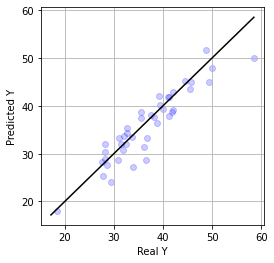

In [175]:
plt.figure(figsize=(4,4))
plt.scatter(y_test, y_pred, alpha=0.2, c="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], c="black") # 線上に乗ってる程よい
plt.grid()
plt.xlabel("Real Y")
plt.ylabel("Predicted Y")
plt.show()

In [ ]:
# 8. 線形補完
# 以下のような欠損値を含むデータ(df_8)を線形補完しなさい。
# 線形補完：2点間を直線結んで等間隔で埋めること

In [179]:
df_8 = pd.DataFrame([5, np.nan, np.nan, np.nan, 8], columns=['interpol'])
df_8

,interpol
0,5.0
1,NaN
2,NaN
3,NaN
4,8.0


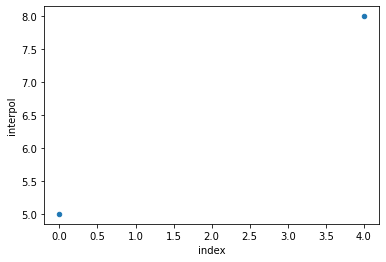

In [184]:
df_8.plot.scatter(x='index', y='interpol')

In [187]:
df_8.interpolate(method='linear', limit_direction='forward', limit_area='inside')

,index,interpol
0,0,5.00
1,1,5.75
2,2,6.50
3,3,7.25
4,4,8.00


In [ ]:
# 9. 中心化
# 以下のようにランダムに生成したデータ(x, y)から中心化したデータ(X, Y)を作成しなさい。

In [189]:
x, y = np.random.randint(50, 120, 20), np.random.randint(10, 30, 20)
X, Y = x-x.mean(), y-y.mean()

In [ ]:
# 10. 中心化の可視化
# 先ほど中心化したデータ(X, Y)をプロットしなさい。

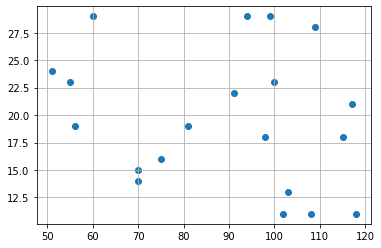

In [190]:
plt.scatter(x, y)
plt.grid(True)

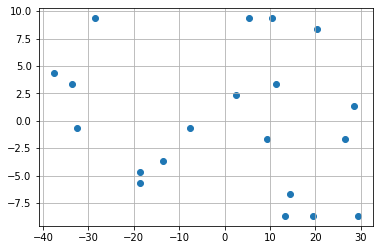

In [191]:
plt.scatter(X, Y)
plt.grid(True)